## 신경망과 딥러닝
# 전이학습

### 유명한 CNN 아키텍처
https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d <br>
- LeNet-5
- AlexNet
- VGG-16
- Inception-v1
- Inception-v3
- ResNet-50
- Xception
- Inception-v4
- Inception-ResNets
- ResNeXt-50

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dir(keras.applications)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'densenet',
 'efficientnet',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

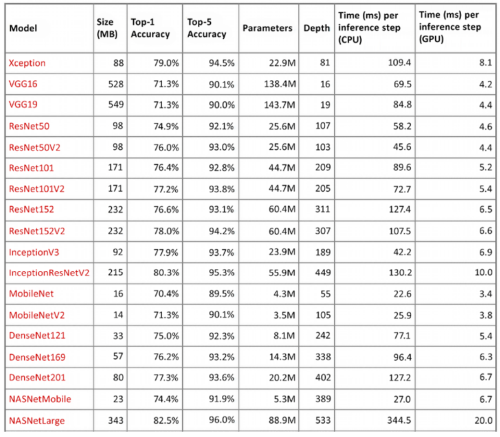

### VGG16 분류
- include_top=True

In [6]:
help(keras.applications.vgg16.VGG16)

Help on function VGG16 in module tensorflow.python.keras.applications.vgg16:

VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')
    Instantiates the VGG16 model.
    
    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    The default input size for this model is 224x224.
    
    Note: each Keras Application expects a specific kind of input preprocessing.
    For VGG16, call `tf.keras.applications.vgg16.preprocess_input` on your
    inputs before passing them to the mo

In [8]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')
    # input_shape=(224, 224, 3)
    # C:\Users\user\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5

In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

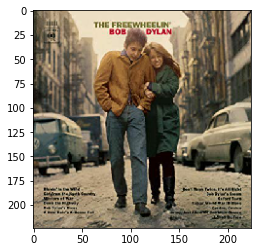

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

bob = load_img('bob_dylan.jpg', target_size=(224, 224))
bob = img_to_array(bob)
plt.imshow(bob/255.)

> skimage 사용시
```
import skimage

bob = skimage.io.imread('bob_dylan.jpg') # 0~255
bob = skimage.transform.resize(bob, (224,224)) # 0.0~1.0
skimage.io.imshow(bob)
```

In [13]:
from tensorflow.keras.applications.vgg16 import preprocess_input

input_image = np.expand_dims(bob, axis=0)
input_image = preprocess_input(input_image)

input_image.shape, input_image.max(), input_image.min()

((1, 224, 224, 3), 138.22101, -123.68)

In [14]:
result = model.predict(input_image)
result.shape

(1, 1000)

In [15]:
np.argsort(result[0])[::-1][:10]

array([675, 468, 734, 654, 569, 656, 407, 708, 561, 879], dtype=int64)

In [16]:
from tensorflow.keras.applications.vgg16 import decode_predictions

decode_predictions(result, top=10)

[[('n03796401', 'moving_van', 0.19718799),
  ('n02930766', 'cab', 0.09000346),
  ('n03977966', 'police_van', 0.06667397),
  ('n03769881', 'minibus', 0.05160552),
  ('n03417042', 'garbage_truck', 0.047403127),
  ('n03770679', 'minivan', 0.030321062),
  ('n02701002', 'ambulance', 0.026834985),
  ('n03903868', 'pedestal', 0.016716454),
  ('n03384352', 'forklift', 0.016439533),
  ('n04507155', 'umbrella', 0.015800046)]]

In [17]:
from tensorflow.keras.applications.vgg16 import decode_predictions

In [18]:
labels = [i[0][1] for i in decode_predictions(np.eye(1000), top=1)]
len(labels)

1000

In [19]:
for i in labels:
    if i.find('dog')>=0: print(i)

Maltese_dog
Old_English_sheepdog
Shetland_sheepdog
Greater_Swiss_Mountain_dog
Bernese_mountain_dog
French_bulldog
Eskimo_dog
African_hunting_dog
dogsled
hotdog


- 중간층 출력이미지 확인

In [13]:
for i,layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [13]:
#block3_conv1 = vgg16.get_layer('block3_conv1')
activation_model = keras.models.Model(inputs=model.input,
                        outputs=model.layers[7].output) # block3_conv1

In [14]:
result = activation_model.predict(input_image)
result.shape

(1, 56, 56, 256)

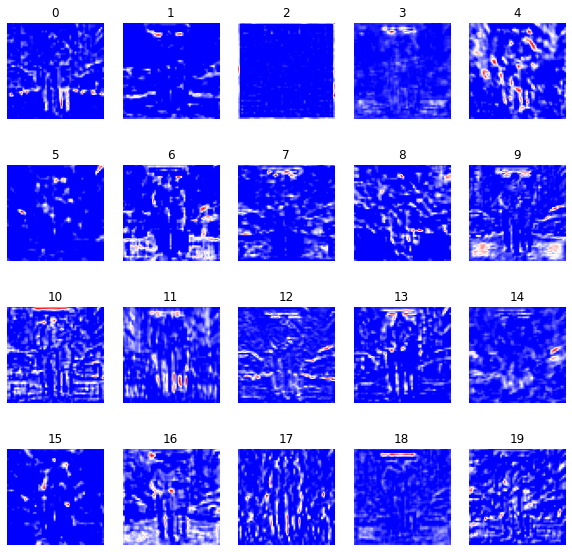

In [15]:
plt.figure(figsize=[10,10])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(result[0,:,:,i], cmap='bwr')
    plt.axis('off')
    plt.title(i)

### VGG16 전이학습
- include_top=False

In [14]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',
                            input_shape=(150,150,3))

In [15]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

- 이미지 파일 변환
> - VGG 아키텍처는 훈련하지 않고 이미지를 변환하는 용도로만 사용한다
> - 그러므로, 모든 이미지를 VGG 에 적용하여 변환된 이미지 결과만 따로 저장한다

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [17]:
datagen = ImageDataGenerator(rescale=1/255)

generator = datagen.flow_from_directory('cats_and_dogs_small/train',
                    target_size=(150,150), batch_size=20, class_mode='binary')

X_train = np.zeros([2000,4,4,512])
y_train = np.zeros(2000)

for step in range(100): # 2000//20
    X_batch, y_batch = generator.next()
    pred = vgg16.predict(X_batch)
    
    X_train[20*step:20*(step+1)] = pred
    y_train[20*step:20*(step+1)] = y_batch
    print('.', end='')
    
X_train.shape, y_train.shape

Found 2000 images belonging to 2 classes.
....................................................................................................

((2000, 4, 4, 512), (2000,))

- 변환된 이미지파일 저장

In [18]:
np.savez('cats_and_dogs_vgg.npz', x=X_train, y=y_train)

In [19]:
npzfile = np.load('cats_and_dogs_vgg.npz')
npzfile.files

['x', 'y']

In [20]:
npzfile['x'].shape, npzfile['y'].shape

((2000, 4, 4, 512), (2000,))

In [21]:
X_train = npzfile['x']
y_train = npzfile['y']

- 모델 훈련

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(4,4,512)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
history = model.fit(X_train, y_train, epochs=30, batch_size=20,
                   validation_split=0.2)

Epoch 1/30
80/80 [==============================] - 2s 19ms/step - loss: 0.7126 - acc: 0.6656 - val_loss: 0.3736 - val_acc: 0.8500
Epoch 2/30
80/80 [==============================] - 1s 17ms/step - loss: 0.4113 - acc: 0.8138 - val_loss: 0.2902 - val_acc: 0.8800
Epoch 3/30
80/80 [==============================] - 1s 14ms/step - loss: 0.3224 - acc: 0.8606 - val_loss: 0.2902 - val_acc: 0.8700
Epoch 4/30
80/80 [==============================] - 1s 11ms/step - loss: 0.2950 - acc: 0.8881 - val_loss: 0.2443 - val_acc: 0.9025
Epoch 5/30
80/80 [==============================] - 1s 11ms/step - loss: 0.2267 - acc: 0.9106 - val_loss: 0.3067 - val_acc: 0.8425
Epoch 6/30
80/80 [==============================] - 1s 11ms/step - loss: 0.2128 - acc: 0.9144 - val_loss: 0.2952 - val_acc: 0.8750
Epoch 7/30
80/80 [==============================] - 1s 11ms/step - loss: 0.1955 - acc: 0.9250 - val_loss: 0.2482 - val_acc: 0.8950- loss: 0.1795 - acc: 
Epoch 8/30
80/80 [==============================] - 1s 11ms/s

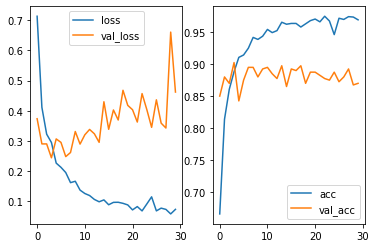

In [25]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### Inception

In [26]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [26]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [27]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [28]:
for i,layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_3 [(None, 299, 299, 3)]
1 conv2d (None, 149, 149, 32)
2 batch_normalization (None, 149, 149, 32)
3 activation (None, 149, 149, 32)
4 conv2d_1 (None, 147, 147, 32)
5 batch_normalization_1 (None, 147, 147, 32)
6 activation_1 (None, 147, 147, 32)
7 conv2d_2 (None, 147, 147, 64)
8 batch_normalization_2 (None, 147, 147, 64)
9 activation_2 (None, 147, 147, 64)
10 max_pooling2d (None, 73, 73, 64)
11 conv2d_3 (None, 73, 73, 80)
12 batch_normalization_3 (None, 73, 73, 80)
13 activation_3 (None, 73, 73, 80)
14 conv2d_4 (None, 71, 71, 192)
15 batch_normalization_4 (None, 71, 71, 192)
16 activation_4 (None, 71, 71, 192)
17 max_pooling2d_1 (None, 35, 35, 192)
18 conv2d_8 (None, 35, 35, 64)
19 batch_normalization_8 (None, 35, 35, 64)
20 activation_8 (None, 35, 35, 64)
21 conv2d_6 (None, 35, 35, 48)
22 conv2d_9 (None, 35, 35, 96)
23 batch_normalization_6 (None, 35, 35, 48)
24 batch_normalization_9 (None, 35, 35, 96)
25 activation_6 (None, 35, 35, 48)
26 activation_9 (None, 35, 35, 96)
27 aver

- Inception-v3 의 입력이미지는 299x299x3 이고,
- -1 ~ 1 사이의 실수값으로 전처리한다

In [30]:
img = keras.preprocessing.image.load_img('bob_dylan.jpg', target_size=(299,299))
bob = keras.preprocessing.image.img_to_array(img)
bob = ((bob/255.)-0.5)*2

In [31]:
bob.shape, bob.max(), bob.min(), bob.dtype

((299, 299, 3), 1.0, -1.0, dtype('float32'))

In [36]:
out = base_model.predict(bob.reshape(1,299,299,3))
out.shape

(1, 1000)

In [37]:
out.argmax(axis=1)

array([608], dtype=int64)

In [39]:
out[0].argsort()[::-1]

array([608, 568, 487, 399, 478, 468, 834, 401, 513, 837, 841, 869, 879,
       593, 523, 454, 479, 728, 873, 921, 670, 569, 917, 971, 918, 678,
       630, 682, 819, 791, 872, 447, 889, 829, 655, 882, 699, 704, 836,
       570, 501, 916, 646, 862, 610, 561, 412, 770, 514, 741, 519, 751,
       797, 668, 424, 612, 776, 558, 903, 684, 675, 656, 796, 531, 817,
       790, 594, 654, 830, 603, 880, 922, 515, 428, 462, 774, 498, 640,
       707, 517, 432, 652, 727, 761, 788, 419, 414, 566, 824, 163, 665,
       715, 457, 840, 734, 808, 565, 436, 802, 458, 573, 627, 866, 835,
       759, 409, 874, 865, 585, 673, 367, 764, 439,  63, 219, 870, 552,
       408, 475, 161, 867, 982, 546, 642, 683, 220, 863, 486, 611, 778,
       818, 919, 502, 636, 820, 549, 463, 156, 643, 518, 203, 731, 875,
       735, 442, 413, 956, 779, 650, 326, 559, 848, 386, 297, 400, 589,
       511, 621, 667, 358, 264, 822, 792, 688, 185, 793, 460, 244, 864,
       218, 474, 583, 677, 811, 999, 861, 480, 345, 199, 622, 35

In [34]:
decode_predictions(out, top=10)

[[('n03594734', 'jean', 0.12155974),
  ('n03404251', 'fur_coat', 0.10070072),
  ('n02992529', 'cellular_telephone', 0.05656003),
  ('n02667093', 'abaya', 0.04886628),
  ('n02971356', 'carton', 0.03078817),
  ('n02930766', 'cab', 0.025535598),
  ('n04350905', 'suit', 0.02405015),
  ('n02672831', 'accordion', 0.017367443),
  ('n03110669', 'cornet', 0.016537193),
  ('n04356056', 'sunglasses', 0.016068151)]]

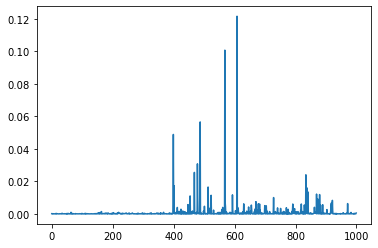

In [35]:
plt.plot(out.ravel())

### Inception-V3 전이학습
> - include_top = False
> - base_model.trainable = False

In [46]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

In [47]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 149, 149, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 149, 149, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [48]:
model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.GlobalAveragePooling2D()) # 채널별 평균값을 구한다
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 22,327,585
Trainable params: 22,293,153
Non-trainable params: 34,432
_________________________________________________________________


In [50]:
train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [51]:
validation_datagen = ImageDataGenerator(rescale=1/255.)
validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [52]:
base_model.trainable = False

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [54]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 58s 531ms/step - loss: 0.1027 - acc: 0.9765 - val_loss: 0.0335 - val_acc: 0.9930
Epoch 2/5
100/100 [==============================] - 53s 528ms/step - loss: 0.0316 - acc: 0.9915 - val_loss: 0.0221 - val_acc: 0.9950
Epoch 3/5
100/100 [==============================] - 53s 533ms/step - loss: 0.0190 - acc: 0.9955 - val_loss: 0.0182 - val_acc: 0.9950
Epoch 4/5
100/100 [==============================] - 53s 524ms/step - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0159 - val_acc: 0.9940
Epoch 5/5
100/100 [==============================] - 53s 528ms/step - loss: 0.0094 - acc: 0.9975 - val_loss: 0.0168 - val_acc: 0.9940


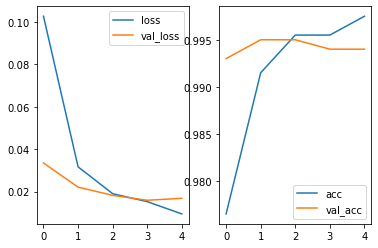

In [55]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])